## Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import hdbscan

## Reading and checking the dataset

In [ ]:
file_path = 'WDI2022.csv'
df = pd.read_csv(file_path)

In [4]:
df.shape

(217, 17)

In [5]:
df.head()

,Country Name,corruption_perception_estimate,access_to_electricity_percent,co2_emissions_per_capita,mobile_cellular_subscriptions_per_100_people,agriculture_value_added_percent_gdp,industry_value_added_percent_gdp,gdp_growth_annual_percent,gdp_per_capita_usd,stability_of_government_estimate,health_expenditure_pct_gdp,child_mortality_rate,life_expectancy_at_birth,fertility_rate_total,population_65_plus_percent,population_total,urban_population_percent
0,Afghanistan,-1.183684,85.30,0.203552,56.26550,33.701432,16.050368,-6.240172,357.261153,-2.544956,23.088169,52.00,65.617,4.932,2.355142,40578842.0,26.616
1,Albania,-0.408189,100.00,1.659293,98.39500,16.984478,23.025056,4.826696,6846.426694,0.106261,6.193681,8.30,78.769,1.355,15.776338,2777689.0,63.799
2,Algeria,-0.638041,100.00,4.104114,107.78700,10.613178,43.048057,3.600000,4961.552577,-0.650652,3.623043,20.00,76.129,2.817,6.186964,45477389.0,74.772
3,American Samoa,1.270272,95.18,0.002069,122.31764,7.658086,19.785807,1.735016,18017.458938,1.123174,10.395107,19.12,72.752,2.305,7.103627,48342.0,87.196
4,Andorra,1.270272,100.00,4.383951,142.42600,0.487492,11.145341,9.564612,42414.059009,1.585988,7.536788,2.60,84.016,1.071,14.968948,79705.0,87.811


### Data preparation and scaling

In [6]:
countries = df['Country Name']
X = df.drop('Country Name', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## K-Means

### Finding the ideal number of clusters (K)

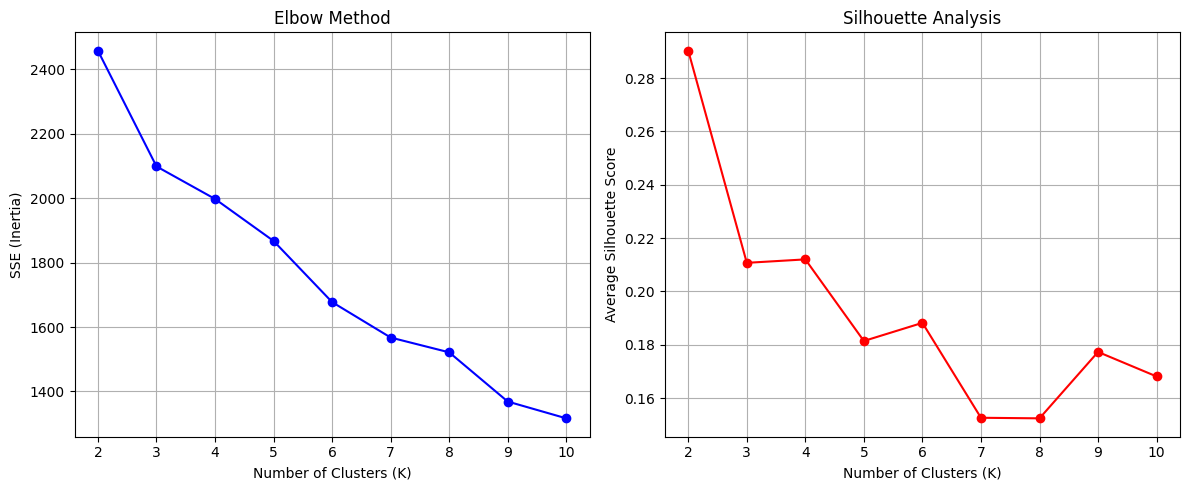

In the 'Elbow Method', look for the point where the curve smooths out.
In the 'Silhouette Analysis', look for the highest point (peak).


In [7]:
# Test from 2 to 10 clusters.
k_range = range(2, 11)
sse = [] # Sum of Squared Errors (for the Elbow Method)
silhouette_scores = [] # For Silhouette Analysis

for k in k_range:
    # K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)

    # For the Elbow Method
    sse.append(kmeans.inertia_)

    # For Silhouette Analysis
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, sse, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method')
plt.grid(True)

# Plotting Silhouette Analysis
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)

plt.tight_layout()
plt.show()

print("In the 'Elbow Method', look for the point where the curve smooths out.")
print("In the 'Silhouette Analysis', look for the highest point (peak).")

### Applying K-Means with the ideal K

In [8]:
# After analysis, K=3 seems like a good choice.
OPTIMAL_K = 3

kmeans_clusterer = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init='auto')
clusters = kmeans_clusterer.fit_predict(X_scaled)

# Add the cluster number back to the original dataframe
df['Cluster'] = clusters

### Analysis and interpretation of results

In [9]:
# 1. View the distribution of countries by cluster
print("\nCountry count per cluster:")
print(df['Cluster'].value_counts().sort_index())


Country count per cluster:
Cluster
0    51
1    94
2    72
Name: count, dtype: int64


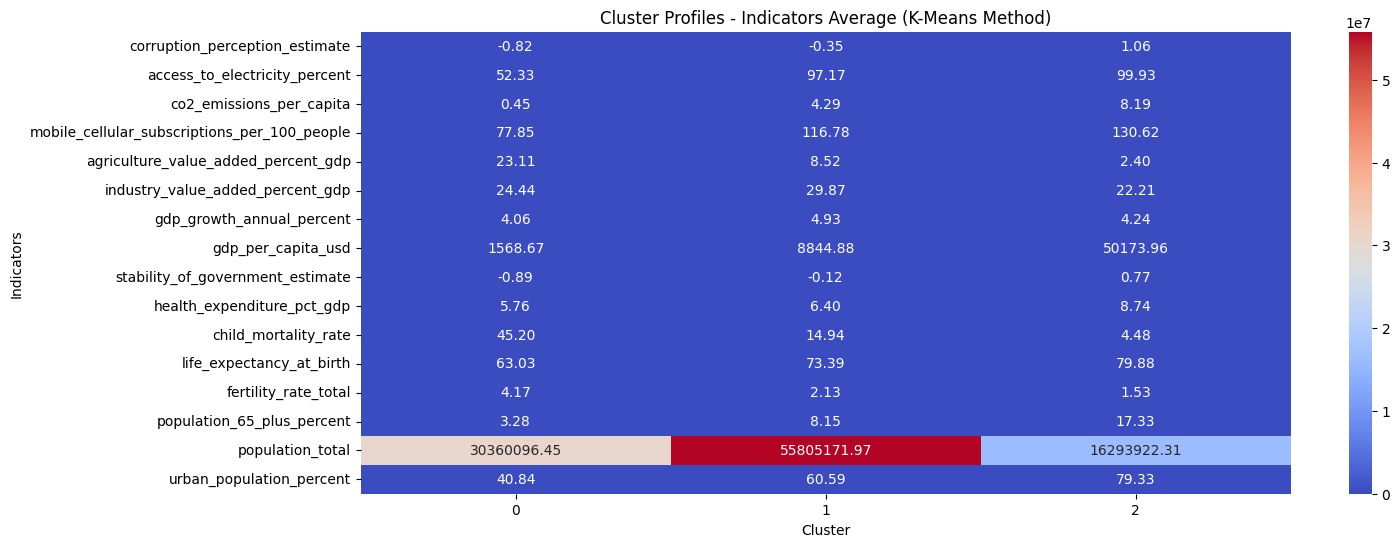

In [10]:
# 2. Analyze the "profile" of each cluster
cluster_profiles = df.groupby('Cluster').mean(numeric_only=True)

plt.figure(figsize=(15, 6))
sns.heatmap(cluster_profiles.T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cluster Profiles - Indicators Average (K-Means Method)')
plt.ylabel('Indicators')
plt.show()

In [11]:
# 3. View some countries from a specific cluster for better understanding
print("\nExample: Top 10 countries in Cluster 0:")
print(df[df['Cluster'] == 0]['Country Name'].head(10))

print("\nExample: Top 10 countries in Cluster 1:")
print(df[df['Cluster'] == 1]['Country Name'].head(10))

print("\nExample: Top 10 countries in Cluster 2:")
print(df[df['Cluster'] == 2]['Country Name'].head(10))


Example: Top 10 countries in Cluster 0:
0                  Afghanistan
5                       Angola
20                       Benin
30                Burkina Faso
31                     Burundi
34                    Cameroon
37    Central African Republic
38                        Chad
43                     Comoros
44            Congo, Dem. Rep.
Name: Country Name, dtype: object

Example: Top 10 countries in Cluster 1:
1                 Albania
2                 Algeria
6     Antigua and Barbuda
7               Argentina
8                 Armenia
12             Azerbaijan
14                Bahrain
15             Bangladesh
17                Belarus
19                 Belize
Name: Country Name, dtype: object

Example: Top 10 countries in Cluster 2:
3     American Samoa
4            Andorra
9              Aruba
10         Australia
11           Austria
13      Bahamas, The
16          Barbados
18           Belgium
21           Bermuda
29          Bulgaria
Name: Country Name, dtype: ob

### List with all countries by each cluster

In [13]:
# Output filename
output_filename = "kmeans_country_list_by_cluster.txt"
num_clusters = 3

try:
    # Open the file for writing
    with open(output_filename, "w", encoding="utf-8") as f:
        f.write("List of Countries by Cluster\n")
        f.write("============================\n\n")

        # Iterate through each cluster
        for cluster_num in range(num_clusters):
            f.write(f"--- CLUSTER {cluster_num} ---\n\n")

            # Filter and sort countries in the current cluster
            countries_in_cluster = df[df['Cluster'] == cluster_num]['Country Name'].sort_values()

            # Write each country to the file
            if countries_in_cluster.empty:
                f.write("No countries found in this cluster.\n")
            else:
                for country in countries_in_cluster:
                    f.write(f"- {country}\n")

            f.write("\n\n")

    print(f"File '{output_filename}' generated successfully!")

except NameError:
    print("ERROR: The DataFrame was not found.")
except KeyError:
    print("ERROR: Column not found in the DataFrame.")

File 'kmeans_country_list_by_cluster.txt' generated successfully!


## HDBSCAN

In [ ]:
# Applying HDBSCAN
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5,
                                    min_samples=None,
                                    gen_min_span_tree=True)

clusters = hdbscan_clusterer.fit_predict(X_scaled)

# Adding the results to the DataFrame
df['Cluster'] = clusters

### Analysis and interpretation of results

In [15]:
# 1. View the distribution of countries by cluster
print("\nCountry count per cluster:")
print(df['Cluster'].value_counts().sort_index())


Country count per cluster:
Cluster
-1     94
 0     18
 1    105
Name: count, dtype: int64


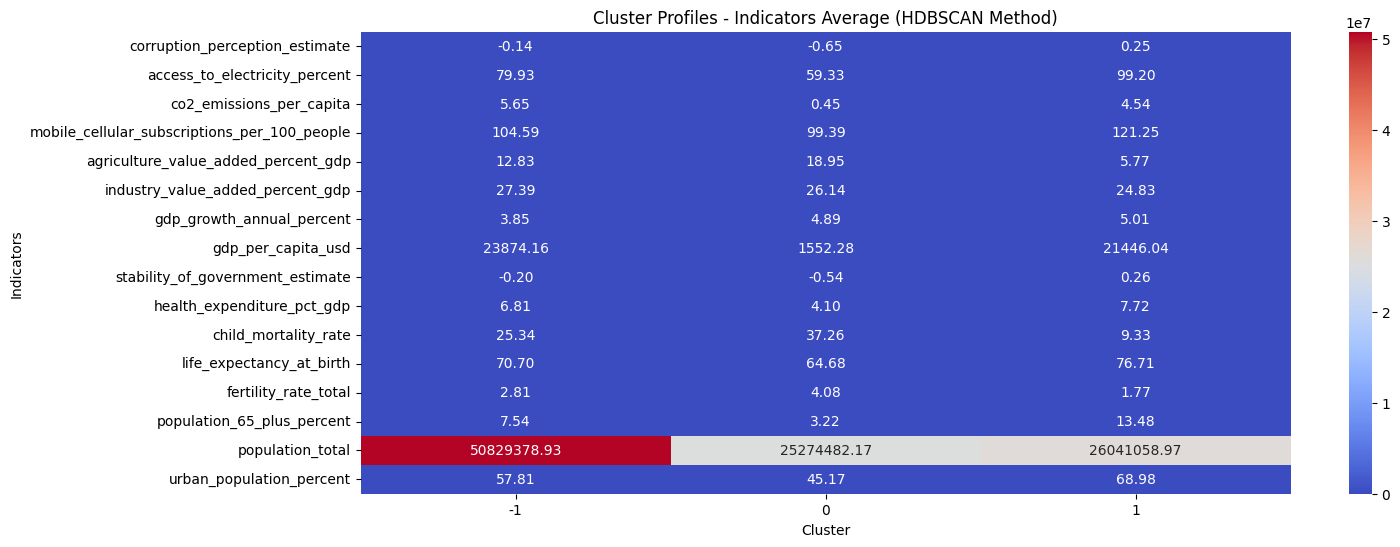

In [16]:
# 2. Analyze the "profile" of each cluster
cluster_profiles = df.groupby('Cluster').mean(numeric_only=True)

plt.figure(figsize=(15, 6))
sns.heatmap(cluster_profiles.T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cluster Profiles - Indicators Average (HDBSCAN Method)')
plt.ylabel('Indicators')
plt.show()

In [17]:
# 3. View some countries from a specific cluster for better understanding
print("\nExample: Top 10 countries in Cluster -1:")
print(df[df['Cluster'] == -1]['Country Name'].head(10))

print("\nExample: Top 10 countries in Cluster 0:")
print(df[df['Cluster'] == 0]['Country Name'].head(10))

print("\nExample: Top 10 countries in Cluster 1:")
print(df[df['Cluster'] == 1]['Country Name'].head(10))


Example: Top 10 countries in Cluster -1:
0             Afghanistan
6     Antigua and Barbuda
12             Azerbaijan
14                Bahrain
21                Bermuda
22                 Bhutan
25               Botswana
28      Brunei Darussalam
30           Burkina Faso
31                Burundi
Name: Country Name, dtype: object

Example: Top 10 countries in Cluster 0:
5             Angola
20             Benin
34          Cameroon
47     Cote d'Ivoire
61           Eritrea
71       Gambia, The
74             Ghana
81            Guinea
101            Kenya
118       Madagascar
Name: Country Name, dtype: object

Example: Top 10 countries in Cluster 1:
1            Albania
2            Algeria
3     American Samoa
4            Andorra
7          Argentina
8            Armenia
9              Aruba
10         Australia
11           Austria
13      Bahamas, The
Name: Country Name, dtype: object


### List with all countries by each cluster

In [18]:
# Output filename
output_filename = "hdbscan_country_list_by_cluster.txt"

try:
    # Open the file for writing
    with open(output_filename, "w", encoding="utf-8") as f:
        f.write("List of Countries by Cluster\n")
        f.write("============================\n\n")

        # Iterate through each cluster
        for cluster_num in range(-1, 2):
            f.write(f"--- CLUSTER {cluster_num} ---\n\n")

            # Filter and sort countries in the current cluster
            countries_in_cluster = df[df['Cluster'] == cluster_num]['Country Name'].sort_values()

            # Write each country to the file
            if countries_in_cluster.empty:
                f.write("No countries found in this cluster.\n")
            else:
                for country in countries_in_cluster:
                    f.write(f"- {country}\n")

            f.write("\n\n")

    print(f"File '{output_filename}' generated successfully!")

except NameError:
    print("ERROR: The DataFrame was not found.")
except KeyError:
    print("ERROR: Column not found in the DataFrame.")

File 'hdbscan_country_list_by_cluster.txt' generated successfully!
